In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import chart_studio.plotly as py

# need to change notebook mode when not in a notebook environment
init_notebook_mode(connected=True) 

# changing visual setting to see every column in output
pd.set_option("display.max_columns", None)

In [24]:
# gathering data
data = pd.read_csv("~/projects/portfolio/Telco-Churn-Analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preparing Data

In [25]:
# surface data check
data.head(10)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
# removing customerid column
data = data.drop(columns='customerID')

In [28]:
#formatting columne names
data.columns= data.columns.str.lower()
#formatting boolean columns
data['partner'] = data['partner'].map({'Yes': True, 'No': False})
data['dependents'] = data['dependents'].map({'Yes': True, 'No': False})
data['phoneservice'] = data['phoneservice'].map({'Yes': True, 'No': False})
data['paperlessbilling'] = data['paperlessbilling'].map({'Yes': True, 'No': False})
data['churn'] = data['churn'].map({'Yes': True, 'No': False})
data['seniorcitizen'] = data['seniorcitizen'].map({0: False, 1: True})

In [29]:
#converting object columns to more workable data types
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

data = data.astype({'gender':'category','multiplelines':'category',
            'internetservice':'category','onlinesecurity':'category',
            'onlinebackup':'category','deviceprotection':'category',
            'techsupport':'category','streamingtv':'category',
            'streamingmovies':'category','contract':'category',
            'paymentmethod':'category'})

In [30]:
#cleaning up column names
data = data.rename(columns={'seniorcitizen':'senior_citizen', 'phoneservice':'phone_service',
 'multiplelines':'multiple_lines', 'internetservice':'internet_service',
 'onlinesecurity':'online_security', 'onlinebackup':'online_backup',
 'deviceprotection':'device_protection', 'techsupport':'tech_support',
 'streamingtv':'streaming_tv', 'streamingmovies':'streaming_movies',
 'paperlessbilling':'paperless_bill','paymentmethod':'payment_method',
 'monthlycharges':'monthly_charges', 'totalcharges':'total_charges'})


In [31]:
# check for null rows
data.isna().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_bill        0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

In [32]:
# check for duplicated rows
data.duplicated().sum()

22

In [33]:
# break fields down into categories by their characteristics
demo = ['gender','senior_citizen','partner','dependents']
account = ['tenure','monthly_charges','contract','payment_method','paperless_billing']
services = ['phone_service','multiple_lines','internet_service','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies']

# Exploring Data

In [9]:
# summary statistics
data.describe(include='all')

,customerid,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_bill,payment_method,monthly_charges,total_charges,churn
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,False,False,False,NaN,True,No,Fiber optic,No,No,No,No,No,No,Month-to-month,True,Electronic check,NaN,NaN,False
freq,1,3555,5901,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


In [15]:
# quick cross correlation check
data.corr()

,senior_citizen,partner,dependents,tenure,phone_service,paperless_bill,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.102411,0.150889
partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.319072,-0.150448
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.064653,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.825880,-0.352229
phone_service,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113008,0.011942
paperless_bill,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.157830,0.191825
monthly_charges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651065,0.193356
total_charges,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.199484,1.000000


In [34]:
# calculating churn rates

# create dictionary for columns of categorical data
dic = {'gender':{}, 'senior_citizen':{}, 'partner':{}, 'dependents':{},
       'phone_service':{}, 'multiple_lines':{}, 'internet_service':{},
       'online_security':{}, 'online_backup':{}, 'device_protection':{}, 'tech_support':{},
       'streaming_tv':{}, 'streaming_movies':{}, 'contract':{}, 'paperless_bill':{},
       'payment_method':{}}

# compute churn rates and fill in dictionary for each measure
for c in dic:
    out = data[[c, 'churn']].groupby(c).mean()
    dic[c] = out.to_dict(orient='index')

# turn the dictionary into a dataframe
churn_rate = pd.DataFrame.from_dict(dic, orient="index").stack().to_frame()
# formatting dataframe 
churn_rate = pd.DataFrame(churn_rate[0].values.tolist(), index=churn_rate.index)

# returning the table
churn_rate

churn
gender            Female                     0.269209
                  Male                       0.261603
senior_citizen    False                      0.236062
                  True                       0.416813
partner           False                      0.329580
                  True                       0.196649
dependents        False                      0.312791
                  True                       0.154502
phone_service     False                      0.249267
                  True                       0.267096
paperless_bill    False                      0.163301
                  True                       0.335651
multiple_lines    No                         0.250442
                  No phone service           0.249267
                  Yes                        0.286099
internet_service  No                         0.074050
                  DSL                        0.189591
                  Fiber optic                0.418928
online_security   No                         0.417667
                  Yes                        0.146112
                  No internet service        0.074050
online_backup     No                         0.399288
                  Yes                        0.215315
                  No internet service        0.074050
device_protection No                         0.391276
                  Yes                        0.225021
                  No internet service        0.074050
tech_support      No                         0.416355
                  Yes                        0.151663
                  No internet service        0.074050
streaming_tv      No                         0.335231
                  Yes                        0.300702
                  No internet service        0.074050
streaming_movies  No                         0.336804
                  Yes                        0.299414
                  No internet service        0.074050
contract          Month-to-month             0.427097
                  One year                   0.112695
                  Two year                   0.028319
payment_method    Bank transfer (automatic)  0.167098
                  Credit card (automatic)    0.152431
                  Electronic check           0.452854
                  Mailed check               0.191067

In [35]:
# calculating churn rate impacts for each column 
impact = pd.DataFrame(index=['%diff_churn'], columns=data.columns)

for c in data.columns:
    try:
        difference = churn_rate.xs(c, level=0).diff().max().abs()
        impact[c] = float(difference['churn'])
    except:
        impact[c] = None

# formatting table
impact = impact.swapaxes(axis1=0,axis2=1)
impact = impact.drop(labels=['tenure','monthly_charges','total_charges','churn'])
impact = impact.sort_values('%diff_churn', ascending=False)

# returning the table
impact

,%diff_churn
payment_method,0.300423
internet_service,0.229337
senior_citizen,0.180751
paperless_bill,0.17235
dependents,0.158289
device_protection,0.150971
online_backup,0.141265
partner,0.132931
contract,0.084377
tech_support,0.077614


# Visualizing Data

In [36]:
# churn rate is formatted for easier plotting
churn_rate = churn_rate.swapaxes(axis1=0,axis2=1)
churn_rate = churn_rate.rename(index={0: "field", 1: "category"})

#### Exploring Tenure

In [37]:
# creating dataframe subset and calculated columns for subset
ten = data[['tenure','churn']].sort_values(by='tenure')
ten['cum_churn'] = ten['churn'].cumsum()
ten['churn_rate']= ten['churn'].rolling(100).mean()

# drop null rows created by new columns
ten = ten.dropna()

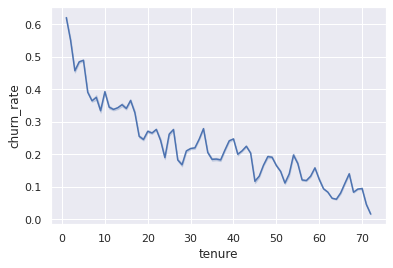

In [38]:
# bivariate analysis of tenure on churn rate
sns.set_theme()
sns.set_style('darkgrid')
sns.lineplot(x='tenure',y='churn_rate',data=ten)

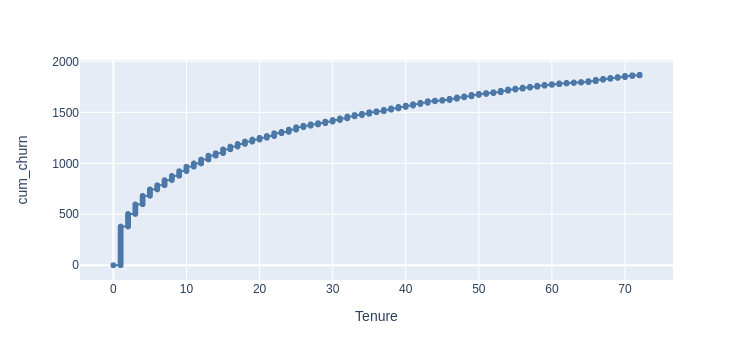

In [55]:
# plotting tenure against cumulative churn
cumtenure_fig = px.line(ten, x="tenure", y="cum_churn", markers=True,
                        labels={'churn_rate':'Cumulative Churn','tenure':'Tenure'},
                        color_discrete_sequence=px.colors.qualitative.T10
                       )
cumtenure_fig.show()

In [42]:
# logarithmic regression
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split

# splitting dataset into training and testing groups
T_train, T_test, C_train, C_test = train_test_split(ten['tenure'], ten['churn_rate'],
                                                    test_size = 0.3, random_state=1)

# designing model
def model(x, a, b, c):
    return a * np.exp(-b * x) + c

popt, pcov = curve_fit(model, T_train, C_train)

# returning model coefficients 
print(f"a: {popt[0]} \nb: {popt[1]}\nc: {popt[2]}")

a: 0.5061235607963032 
b: 0.04589364206126743
c: 0.07657088231369537


In [44]:
# checking goodness of fit
residuals = C_test - model(T_test, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ten['churn_rate']-np.mean(ten['tenure']))**2)
r_squared = 1 - (ss_res / ss_tot)

r_squared

0.9999993099298412

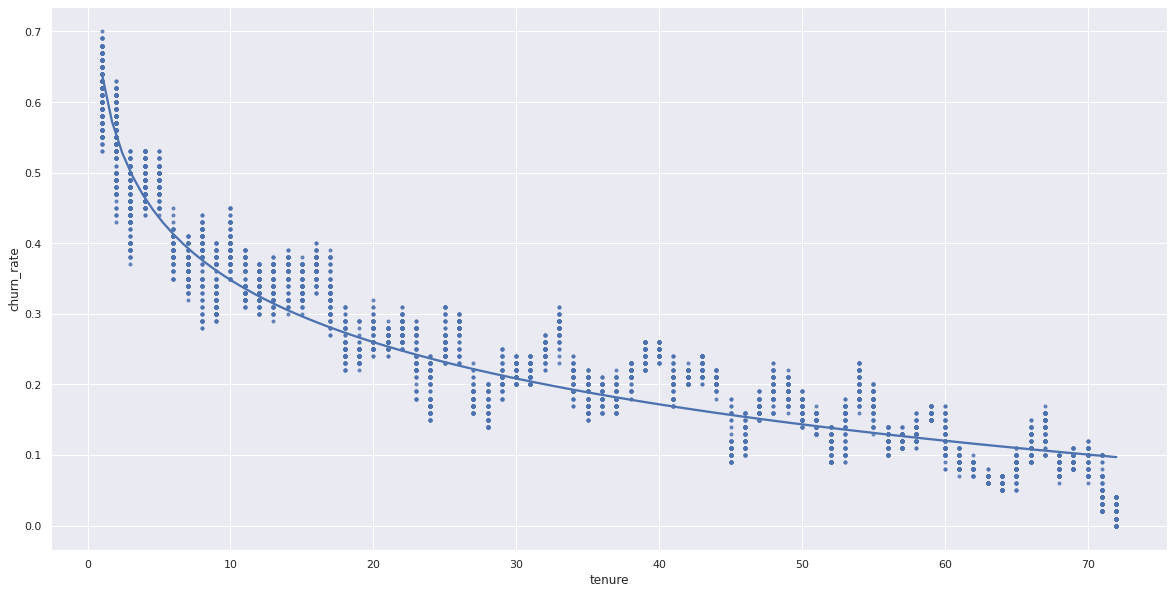

In [39]:
# plotting regression
plt.figure(figsize = (20,10))
sns.regplot(x='tenure',y='churn_rate',data=ten, marker='.',logx=True)

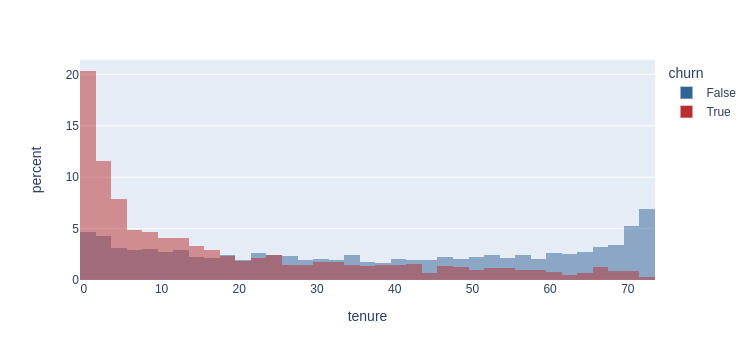

In [53]:
# plotting distribution of tenure based on whether customer has left or not
ten_hist= px.histogram(data, x='tenure',
                       color='churn',
                       barmode='overlay',
                       color_discrete_sequence=[px.colors.qualitative.G10[9],px.colors.qualitative.G10[8]],
                       histnorm='percent'
                      )
ten_hist.show()

#### Contract Length

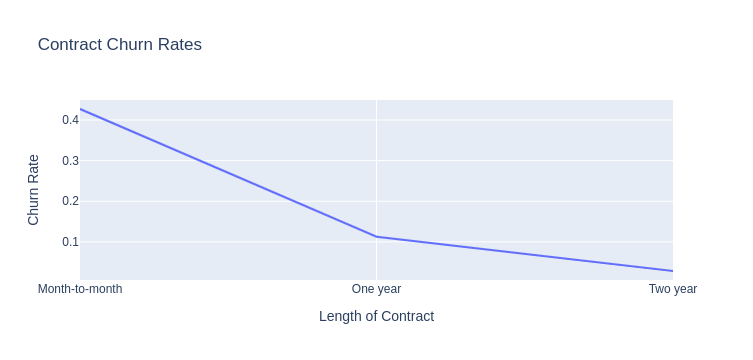

In [103]:
# plotting churn rate against length of contract
contract = churn_rate['contract'].swapaxes(axis1=1, axis2=0).reset_index()
contract_fig = px.line(contract, x="index", y="churn", title='Contract Churn Rates',
                       labels={'index':'Length of Contract','churn':'Churn Rate'})
contract_fig.show()

### Exploring Services Fields

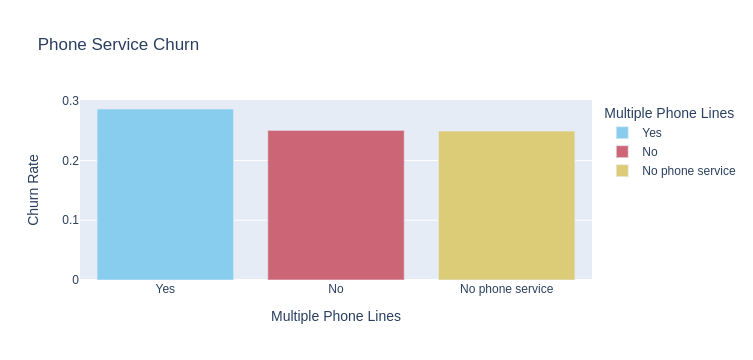

In [97]:
# plotting churn rates of phone services
phone = churn_rate['multiple_lines'].swapaxes(axis1=1, axis2=0).reset_index()
phone_fig = px.bar(phone, x="index", y="churn",
                   color="index",
                   category_orders={'index':['Yes','No','No phone service']},
                   color_discrete_sequence=px.colors.qualitative.Safe,
                   labels={'index':'Multiple Phone Lines','churn':'Churn Rate'},
                   title='Phone Service Churn'
                  )
phone_fig.show()

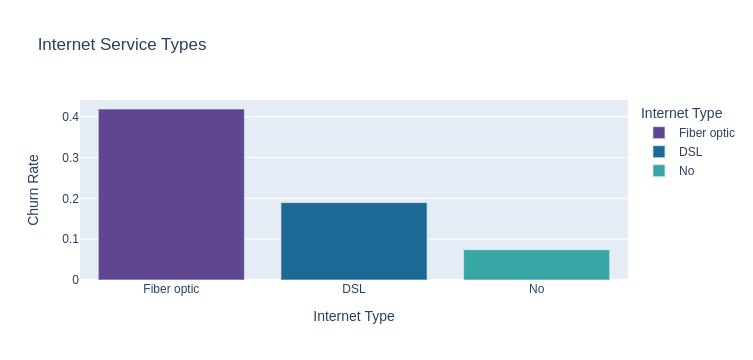

In [67]:
# plotting churn rates of internet service types
internet = churn_rate['internet_service'].swapaxes(axis1=1, axis2=0).reset_index()
internet_fig = px.bar(internet, x="index", y="churn",
                      color="index",
                      category_orders={'index':['Fiber optic','DSL','No']},
                      labels={'index':'Internet Type','churn':'Churn Rate'},
                      title='Internet Service Types',
                      color_discrete_sequence=px.colors.qualitative.Prism
                     )
internet_fig.show()

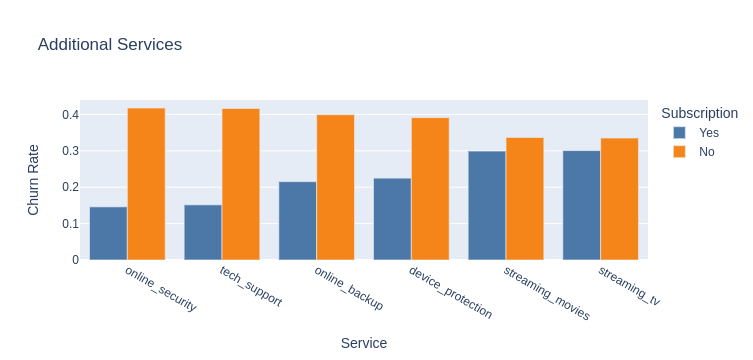

In [69]:
# making bar plot of additional services and their churn rates
churn_serv = churn_rate[['online_security','online_backup','device_protection','tech_support',
                           'streaming_tv','streaming_movies']].swapaxes(axis1=1, axis2=0).reset_index()
churn_serv = churn_serv.rename(columns={'level_0':'field', 'level_1':'category'})
churn_serv = churn_serv[churn_serv.category != 'No internet service']
churn_serv = churn_serv.sort_values(by='churn')

iservices_fig = px.bar(churn_serv, x="field", y="churn", color="category", barmode='group',
                       labels={'field':'Service','category':'Subscription','churn':'Churn Rate'},
                       title='Additional Services',
                       color_discrete_sequence=px.colors.qualitative.T10
                      )
iservices_fig.show()

### Demographics

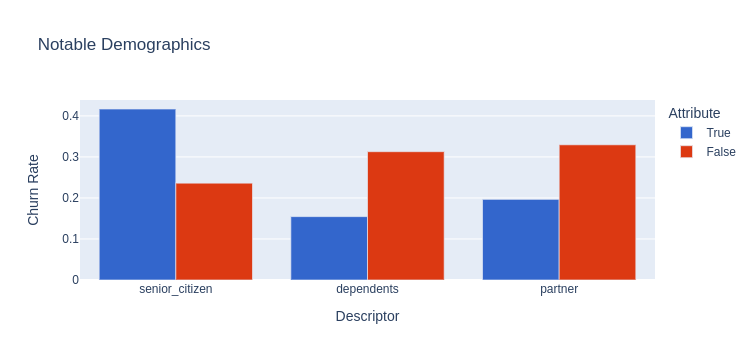

In [70]:
# creating churn rate bar graph of relevant demographic info 
churn_demo = churn_rate[['senior_citizen','dependents','partner']].swapaxes(axis1=1, axis2=0).reset_index()
churn_demo = churn_demo.rename(columns={'level_0':'field', 'level_1':'category'})

demo_fig = px.bar(churn_demo, x="field", y="churn",
                  color="category",
                  barmode='group',
                  category_orders={'category':[True,False]},
                  color_discrete_sequence=px.colors.qualitative.G10,
                  labels={'field':'Descriptor','churn':'Churn Rate', 'category':'Attribute'},
                  title='Notable Demographics'
                 )
demo_fig.show()

In [24]:
# creating subsets of customers with families and those who are alone
families = data[['dependents','partner','churn']].query('dependents == True & partner == True')
single = data[['dependents','partner','churn']].query('dependents == False & partner == False')

single['churn'].mean()/families['churn'].mean()

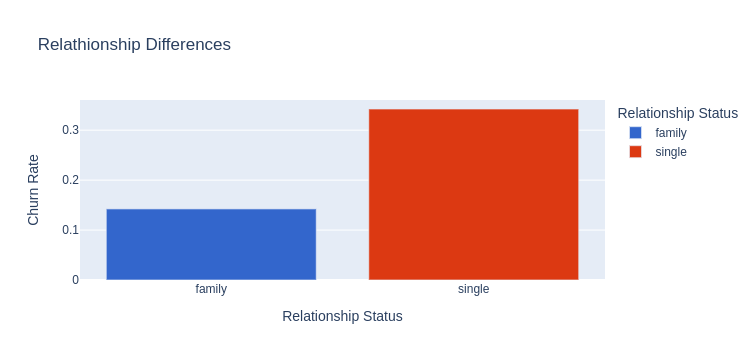

In [73]:
# plotting relationship status churn rates
demo_fam = pd.DataFrame.from_dict({'Relationship Status':['family','single'],
            'Churn Rate':[families['churn'].mean(), single['churn'].mean()]})

fam_fig = px.bar(demo_fam, x="Relationship Status", y="Churn Rate",
                  color="Relationship Status",
                  color_discrete_sequence=px.colors.qualitative.G10,
                  title='Relathionship Differences'
                 )
fam_fig.show()

### Areas To Research Further

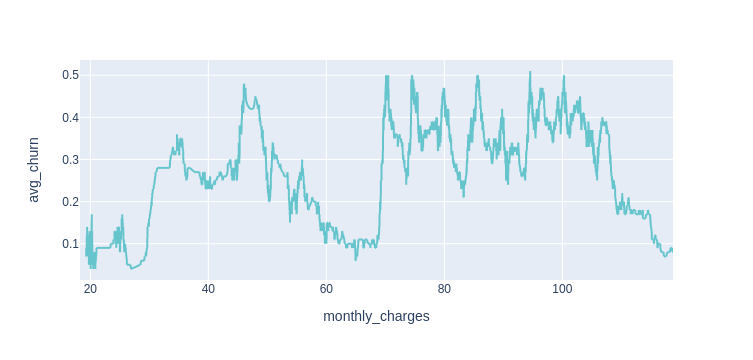

In [94]:
# plotting churn rates against monthly charges
charges = data[['monthly_charges','churn']].sort_values(by='monthly_charges')
charges['cum_churn'] = charges['churn'].cumsum()
charges['churn_rate']= charges['churn'].rolling(100).mean()

charges_fig = px.line(charges, x="monthly_charges", y="avg_churn",
                      color_discrete_sequence=px.colors.qualitative.Pastel
                     )
charges_fig.show()

In [10]:
# adding a new column that measures the number of services a customer has
data['services']= 0

for r in data.index:
    if data.at[r,'phone_service'] == True:
        data.at[r,'services'] +=1
    if data.at[r,'multiple_lines'] == 'Yes':
        data.at[r,'services'] +=1
    if data.at[r,'internet_service'] != 'No':
        data.at[r,'services'] +=1
    if data.at[r,'online_security'] == 'Yes':
        data.at[r,'services'] +=1
    if data.at[r,'online_backup'] == 'Yes':
        data.at[r,'services'] +=1
    if data.at[r,'device_protection'] == 'Yes':
        data.at[r,'services'] +=1
    if data.at[r,'tech_support'] == 'Yes':
        data.at[r,'services'] +=1
    if data.at[r,'streaming_tv'] == 'Yes':
        data.at[r,'services'] +=1
    if data.at[r,'streaming_movies'] == 'Yes':
        data.at[r,'services'] +=1

service_quantity = data[['services', 'churn']].groupby('services').mean()
service_quantity = service_quantity.reset_index()

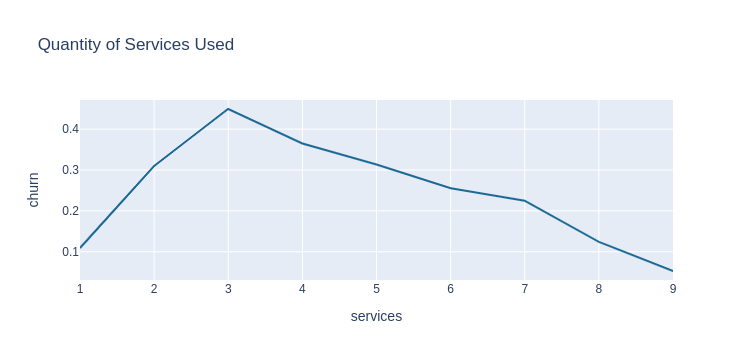

In [78]:
# plotting churn rate against number of services used
qserv_fig = px.line(service_quantity,x='services', y='churn',
                    title='Quantity of Services Used',
                    color_discrete_sequence=[px.colors.qualitative.Prism[1]]
                   )
qserv_fig.show()

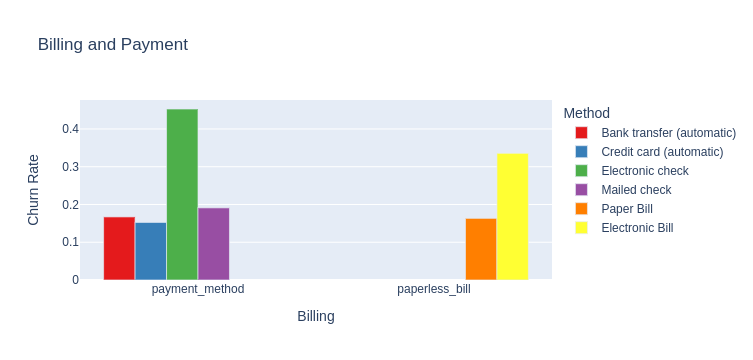

In [101]:
# plotting churn rates of billing information
churn_acc = churn_rate[['payment_method','paperless_bill']].swapaxes(axis1=1, axis2=0).reset_index()
churn_acc = churn_acc.rename(columns={'level_0':'field', 'level_1':'category'})

for i in churn_acc.index:
    if churn_acc.at[i,'category'] == True:
        churn_acc.at[i,'category'] = 'Electronic Bill'
    elif churn_acc.at[i,'category'] == False:
        churn_acc.at[i,'category'] = 'Paper Bill'

billing_fig = px.bar(churn_acc, x="field", y="churn",
                     color="category", barmode='group',
                     color_discrete_sequence=px.colors.qualitative.Set1,
                     labels={'field':'Billing','churn':'Churn Rate','category':'Method'},
                     title='Billing and Payment'
                    )
billing_fig.show()

# *!!!AREA UNDER CONSTRUCTION!!!*

### Customer Profiles

In [42]:
# get subsets of data to explore characteristics of an 'abandoner'
loyal_customers = data.loc[data['churn'] == 0]
abandoners = data.loc[data['churn'] == 1]

loyal_customers = loyal_customers.drop(columns=['customerid','total_charges'])
abandoners = abandoners.drop(columns=['customerid','total_charges'])

In [ ]:
# printing average tenure for both groups
at = abandoners['tenure'].median()
lt = loyal_customers['tenure'].median()

print(f"Avg. tenure of loyal customers: {lt} \nAvg. tenure of churned: {at}")

Avg. tenure of loyal customers: 38.0 
Avg. tenure of churned: 10.0


In [47]:
# printing mode and its frequency
print(loyal_customers['internet_service'].mode().loc[0])
print(loyal_customers['internet_service'].value_counts().max()/loyal_customers['internet_service'].count())

DSL
0.37920371086200233


In [53]:
# making dataframe for field averages of loyal customers
cp_loyal = pd.DataFrame(columns=['field','value','frequency'])

pos = 0
for c in loyal_customers.columns:
    if c in ['tenure','monthly_charges','services']:
        val = loyal_customers[c].median()
        freq = loyal_customers[loyal_customers[c] >= val].count().max()/loyal_customers[c].count()
        cp_loyal.loc[pos]=[c, val, freq]
        pos += 1
    else:
        val = loyal_customers[c].mode().loc[0]
        freq = loyal_customers[c].value_counts().max()/loyal_customers[c].count()
        cp_loyal.loc[pos]=[c, val, freq]
        pos += 1

In [ ]:
# making dataframe for field averages of 'abandoners'
cp_churn = pd.DataFrame(columns=['field','value','frequency'])

pos = 0
for c in abandoners.columns:
    if c in ['tenure','monthly_charges','services']:
        val = abandoners[c].median()
        freq = abandoners[abandoners[c] >= val].count().max()/abandoners[c].count()
        cp_churn.loc[pos]=[c, val, freq]
        pos += 1
    else:
        val = abandoners[c].mode().loc[0]
        freq = abandoners[c].value_counts().max()/abandoners[c].count()
        cp_churn.loc[pos]=[c, val, freq]
        pos += 1

In [91]:
# displaying most common attributes for loyal customers
cp_loyal.sort_values(by='frequency', ascending=False)

,field,value,frequency
18,churn,False,1.0
5,phone_service,True,0.901044
1,senior_citizen,False,0.871279
3,dependents,False,0.655199
19,services,4.0,0.577696
15,paperless_bill,True,0.535562
2,partner,True,0.528218
0,gender,Male,0.507344
4,tenure,38.0,0.50116
17,monthly_charges,64.425,0.5


In [92]:
# displaying most common attributes for 'abandoners'
cp_churn.sort_values(by='frequency', ascending=False)

,field,value,frequency
18,churn,True,1.000000
5,phone_service,True,0.909042
14,contract,Month-to-month,0.885500
3,dependents,False,0.825575
8,online_security,No,0.781701
11,tech_support,No,0.773676
15,paperless_bill,True,0.749064
1,senior_citizen,False,0.745318
7,internet_service,Fiber optic,0.693954
9,online_backup,No,0.659711
